In [1]:
from work.load.main import (
    plot_saliency_time,
)
import joblib

results = joblib.load('output/results.joblib')
csv_name = next(iter(results.keys()))           # just take the first trained file
artifacts_path = results[csv_name]["artifacts_path"]

print(csv_name)




mm118648.csv


c:\Users\janav\Documents\projects\xai-sandbox\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


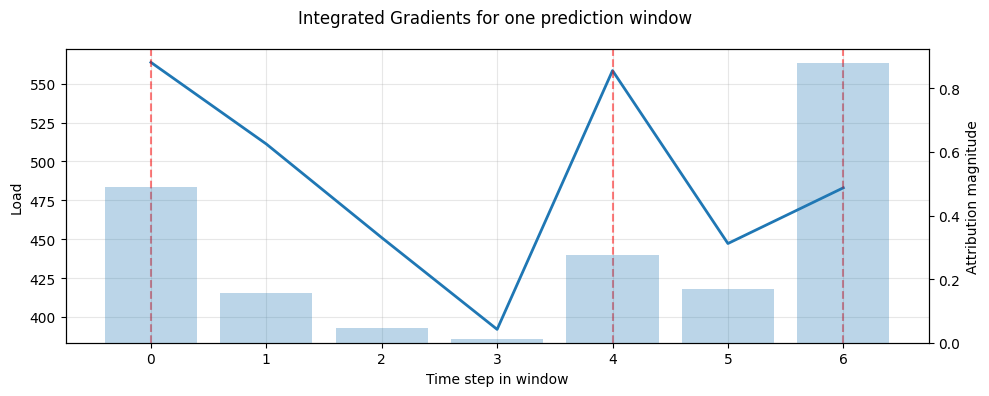

In [2]:
_ = plot_saliency_time(
    artifacts_path,
    example_index=0,
    method="ig",   # or "ig"
    ig_steps=64,
    top_k=3,             # draw vertical lines on top-5 timesteps
)


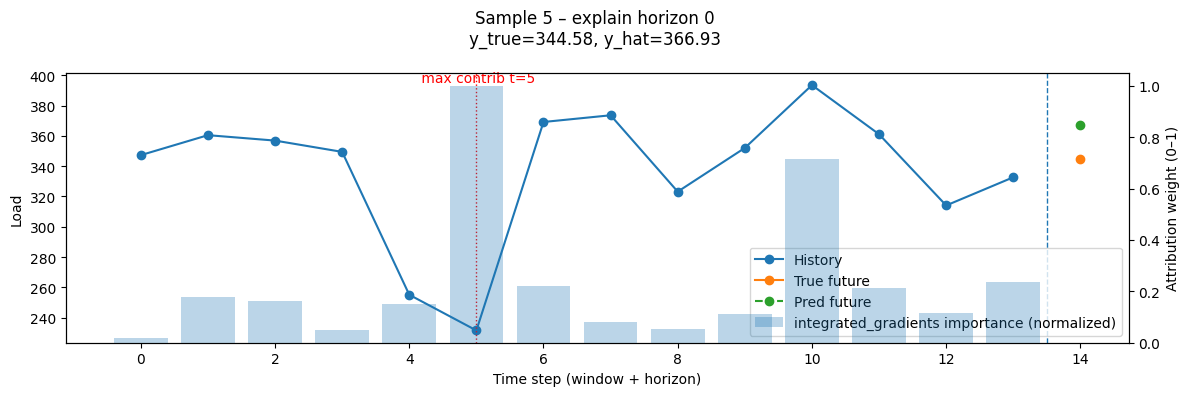

In [2]:
from work.load.custom import load_forecaster_from_disk, plot_forecast_with_explanation


forecaster = load_forecaster_from_disk("mm118648")  # or whatever stem
plot_forecast_with_explanation(
    forecaster,
    sample_idx=5,
    h_index=0,                  # which future step you care about
    method="integrated_gradients",
)

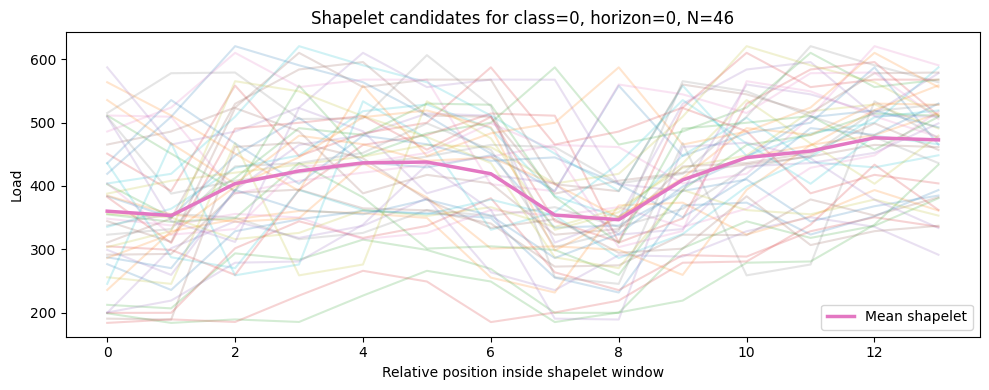

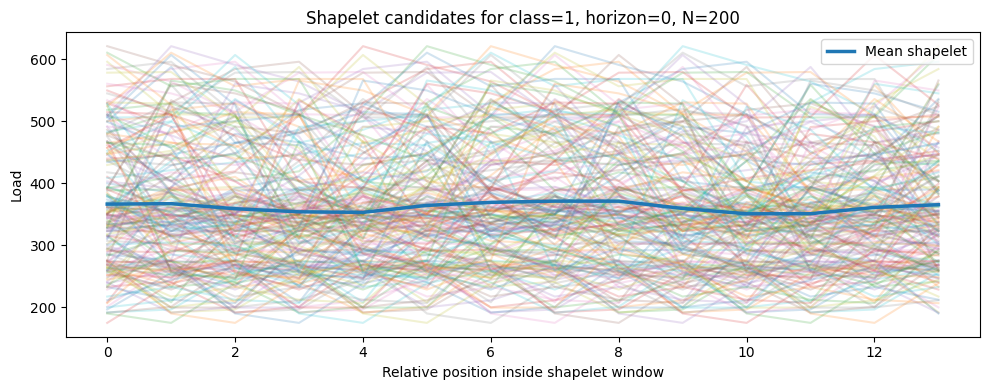

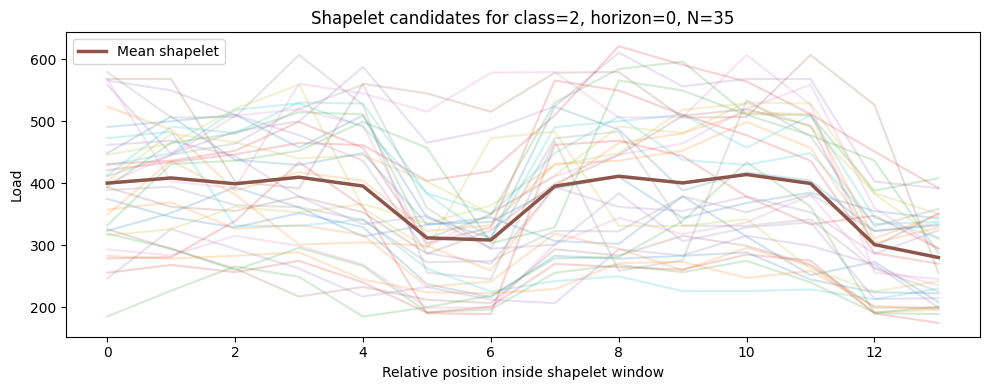

In [3]:
from work.load.custom import extract_and_plot_shapelets_for_class, load_forecaster_from_disk


forecaster = load_forecaster_from_disk("mm118648", device="cpu")

subseqs_fall = extract_and_plot_shapelets_for_class(
    forecaster,
    h_index=0,
    target_class=0,   # 0=fall
    L=14,
    method="integrated_gradients",
    max_samples=200,  # optional cap
)

subseqs_rise = extract_and_plot_shapelets_for_class(
    forecaster,
    h_index=0,
    target_class=1,   # 2=rise
    L=14,
    method="integrated_gradients",
    max_samples=200,
)

subseqs_rise = extract_and_plot_shapelets_for_class(
    forecaster,
    h_index=0,
    target_class=2,   # 2=rise
    L=14,
    method="integrated_gradients",
    max_samples=200,
)
